In [1]:
push!(LOAD_PATH, "./");
LOAD_PATH

3-element Array{String,1}:
 "/opt/julia-3c9d75391c/local/share/julia/site/v0.5"
 "/opt/julia-3c9d75391c/share/julia/site/v0.5"      
 "./"                                               

In [2]:
workspace()
using GroupAlgebras
include("property(T).jl");

In [3]:
using JuMP
import SCS: SCSSolver
using LatexPrint

# Basis of $\mathbb{R}[SL(3,\mathbb{Z})]$
All elements of the group algebra $\mathbb{R}[SL(3,\mathbb{Z})]$ will be written as coefficients vector in the following (partial) basis of the group ring (in total 121 elements)

In [4]:
GROUP = "SL(3,Z)";

In [5]:
basis = read_GAP_raw_list("./basis."*GROUP);
convert_to_matrix(x) = hcat(x...);
basis = map(convert_to_matrix, basis);

# lap(basis...);

$\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 1 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
-1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & -1 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
2 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & 0 \\
1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & 0 \\
1 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
2 & 1 & 0 \\
1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 1 \\
1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & 0 \\
-1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & 0 \\
-1 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
0 & -1 & 0 \\
1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & -1 \\
1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
2 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
1 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 0 \\
0 & 1 & 0 \\
1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
2 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & 1 \\
1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & 0 \\
1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
1 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 0 \\
0 & 1 & 0 \\
1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
0 & 0 & -1 \\
0 & 1 & 0 \\
1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & -1 \\
1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & 0 \\
0 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 2 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 0 \\
0 & 1 & 0 \\
0 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 1 \\
0 & 1 & 0 \\
0 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 2 & 1 \\
0 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & 0 \\
0 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
-1 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 0 \\
0 & 1 & 0 \\
0 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & -1 \\
0 & 1 & 0 \\
0 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 0 & -1 \\
0 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 0 \\
1 & 2 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 0 \\
0 & 1 & 0 \\
1 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 2 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 1 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 0 \\
0 & 1 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 0 \\
-1 & 0 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 0 \\
0 & 1 & 0 \\
-1 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 0 \\
0 & 1 & 0 \\
0 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & -1 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 0 \\
0 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 1 \\
1 & 1 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 2 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 1 \\
0 & 1 & 0 \\
0 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 2 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 1 \\
0 & 1 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 1 \\
-1 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 1 \\
0 & 1 & 0 \\
-1 & 0 & 0 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 1 \\
0 & 1 & 0 \\
0 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 1 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 1 \\
0 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 1 \\
0 & 1 & 2 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 1 \\
0 & 1 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 2 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 1 \\
-1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 1 \\
0 & -1 & 0 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & -1 \\
0 & 1 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & -1 \\
0 & 1 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & 0 \\
-1 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
0 & 1 & 0 \\
-1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 1 \\
-1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
-2 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & 0 \\
-1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & 0 \\
1 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
2 & -1 & 0 \\
-1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & -1 \\
-1 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & 0 \\
0 & 1 & 0 \\
-1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
0 & 0 & 1 \\
0 & 1 & 0 \\
-1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & 1 \\
-1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
-2 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
-1 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 0 \\
0 & 1 & 0 \\
-1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
2 & 0 & -1 \\
0 & 1 & 0 \\
-1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & -1 \\
-1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
1 & 1 & 0 \\
0 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 1 \\
0 & 1 & 0 \\
0 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 0 & 1 \\
0 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
-1 & 1 & 0 \\
0 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & -2 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 0 \\
0 & 1 & 0 \\
0 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & -1 \\
0 & 1 & 0 \\
0 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 2 & -1 \\
0 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 0 \\
0 & 1 & 0 \\
1 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 0 \\
0 & 1 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 0 \\
-1 & 2 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 0 \\
0 & 1 & 0 \\
-1 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -2 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & -1 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 0 \\
0 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & -1 \\
1 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & -1 \\
0 & 1 & 0 \\
1 & 0 & 0 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & -1 \\
0 & 1 & 0 \\
0 & 1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & -1 \\
-1 & 1 & 1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & -1 \\
0 & 1 & 0 \\
-1 & 0 & 2 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & -1 \\
0 & 1 & 0 \\
0 & -1 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & -2 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & -1 \\
0 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & -1 \\
1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & -1 \\
0 & 1 & 0 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 1 & -1 \\
0 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & -1 \\
-1 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & -1 \\
0 & -1 & 2 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & -1 & 1 \\
0 & 1 & -1 \\
0 & 0 & 1 \\
\end{array}
\right]
,\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & -2 \\
0 & 0 & 1 \\
\end{array}
\right]$

# The generating set
We set the generating set $S$ of $SL(3,\mathbb{Z})$ to consist of the following $12$ elements: 
* 3 elementary matrices
* their transpositions
* inverse elements to the above 6

The basis above consists of all words of length less than or equal to $2$ in $S$ (i.e. $S$ and all double products of elements of $S$, excluding repetitions)

$\left[\left(\begin{array}{rrr}
1 & 1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right), \left(\begin{array}{rrr}
1 & 0 & 1 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right), \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 1 \\
0 & 0 & 1
\end{array}\right), \left(\begin{array}{rrr}
1 & 0 & 0 \\
1 & 1 & 0 \\
0 & 0 & 1
\end{array}\right), \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
1 & 0 & 1
\end{array}\right), \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 1 & 1
\end{array}\right), \\\left(\begin{array}{rrr}
1 & -1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right), \left(\begin{array}{rrr}
1 & 0 & -1 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right), \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & -1 \\
0 & 0 & 1
\end{array}\right), \left(\begin{array}{rrr}
1 & 0 & 0 \\
-1 & 1 & 0 \\
0 & 0 & 1
\end{array}\right), \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
-1 & 0 & 1
\end{array}\right), \left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & -1 & 1
\end{array}\right)\right]$

# Elements of $\mathbb{R}[SL(3,\mathbb{Z}]$
Every element 
$$X = \sum_g a_g g\in \mathbb{R}[SL(3,\mathbb{Z}]$$ of the group ring will be represented as type (container) with two elements inside:
1. a vector of coefficients $(a_g)_g$
2. a matrix $P=p_{ij}$ which tells us how to compute product of the element with every other element in basis

We define the Laplacian element as
$$\Delta_S = \Delta = \frac{1}{2}\sum_{g\in S} (1-g)^*\cdot(1-g),$$
where $\cdot$ denotes the group algebra multiplication and $*$ is a linear operator on $\mathbb{R}[SL(3,\mathbb{Z})]$ given by

$$
\begin{align}
g^* &\mapsto g^{-1} \quad \text{for group elements}\\
a_g^* &\mapsto a_g \quad \text{for coefficients.}
\end{align}
$$
(Note: we work over $\mathbb{R}$; over $\mathbb{C}$ the $*$-involution is given by conjugation.)

Example: 
$$(1-x+y)^*\cdot(1-x+y) = (1-x^{-1}+y^{-1})(1-x+y) = 1 - x + y - x^{-1} + 1 - x^{-1}y + y^{-1} - y^{-1}x + 1 = 3 - x - x^{-1} +y + y^{-1} - x^{-1}y - yx^{-1}$$

In [6]:
matrix_constraints = read_GAP_raw_list("./constraints."*GROUP);
product_matrix = create_product_matrix(matrix_constraints);

Delta² = read_GAP_raw_list("./delta_sq."*GROUP);
Delta = read_GAP_raw_list("./delta."*GROUP);

Δ  = GroupAlgebraElement(Delta, product_matrix);
Δ² = GroupAlgebraElement(Delta², product_matrix);
@assert Δ*Δ == Δ²

In [7]:
@show(Δ);
@show(Δ²);

Δ = Element of Group Algebra over Int64
[12,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
Δ² = Element of Group Algebra over Int64
[156,-24,-24,-24,-24,-24,-24,-24,-24,-24,-24,-24,-24,1,2,1,1,1,2,2,1,1,1,2,1,2,1,1,1,2,2,1,1,1,1,1,2,1,1,1,2,2,1,1,1,1,1,2,1,1,1,2,2,1,1,1,1,1,2,1,1,1,2,2,1,1,1,1,2,1,1,1,2,1,1,1,1,2,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1]


Eg. the the $1st$ coefficients of those vectors (respecively $12$ i $156$) corresponds to basis vector $\operatorname{Id}$.

# Semi-definite programming (optimalisation of a linear functional over the manifold of symmetric matrices)

Our main problem is to find (possibly large) constant $\kappa$ such that $\Delta^2 - \kappa \Delta$ can be decomposed in the group ring as a hermitian sum of squares. That is, there exist a finite set of elements $\xi_1, \xi_2,\ldots, \xi_n \in \mathbb{R}[SL(3,\mathbb{Z})]$ such that
$$ \Delta^2 - \kappa\Delta = \sum_{i=1}^n \xi_i^*\xi.$$

Such sum-of-squares decompositions correspond to symmetric, positive semi-definite matrices $A$ such that
$$\left(1, x, x^{-1}, \ldots \right)^*A\left(1, x, x^{-1}, \ldots\right)^T = \Delta^2 - \kappa\Delta $$
for some basis $(1, x, x^{-1}, \ldots )$ of $\mathbb{R}[SL(3,\mathbb{Z})]$. Indeed, since $A$ is symmetric and positive semi-definite, there exist a root $\sqrt{A}$, satisfying $\sqrt{A}\sqrt{A}^T = A$. Then we can set
$$(\xi_1,\xi_2,\ldots,\xi_{n}) = \left(1,x, x^{-1},\ldots\right)\sqrt{A},$$
and it follows that
$$\Delta^2-\kappa\Delta = \left(1,x, x^{-1},\ldots\right)^* A \left(1,x, x^{-1},\ldots \right)^T = \Big(\left(1,x, x^{-1},\ldots\right)\sqrt{A}\Big)^* \Big(\sqrt{A}\left(1,x, x^{-1},\ldots\right)\Big)^T =\\=
(\xi_1,\xi_2,\ldots\xi_{n})^*(\xi_1,\xi_2,\ldots\xi_{n})^T = \sum_{i=1}^{n}\xi_i^*\xi_i
$$

In our case we will try to find such $121\times 121$ matrix $A$ (as our basis consists of $121$ elements) and therefore to express $\Delta^2 - \kappa\Delta$ as sum of $121$ hermitian squares.

First we define `SDP` problem:

In [8]:
SL_3ZZ = create_SDP_problem(matrix_constraints, Δ², Δ);

const TOL=6

setsolver(SL_3ZZ, SCSSolver(eps=10.0^-TOL));
@show(SL_3ZZ);

SL_3ZZ = Maximization problem with:
 * 121 linear constraints
 * 1 semidefinite constraint
 * 7382 variables
Solver is SCS


In [9]:
SL_3ZZ

Maximization problem with:
 * 121 linear constraints
 * 1 semidefinite constraint
 * 7382 variables
Solver is SCS

This includes:
1. defining $\kappa$ as a variable
2. setting maximizing $\kappa$ as the objective
3. defining matrix $A$ of $121\times 121$ variables $a_{i,j}$ and adding constraints:
  * $A\succeq 0$, i.e. $A$ is positive semi-definite
  * $(1, x, \ldots)^* A (1, x, \ldots)^T = \Delta^2 - \kappa\Delta$ (this is achieved on the matrix: entries which contribute to a given poistion in the resulting vector are constrained by the appropriate coefficient in $\Delta^2 - \kappa\Delta$.

# Numeric solution
Which takes $< 30s$ (depending on the precision and processor&memory)

In [10]:
solution_status = solve(SL_3ZZ);

κ = SL_3ZZ.objVal;
A = getvalue(getvariable(SL_3ZZ, :A));; # Pobiera wartość numeryczną

@show solution_status;
@show κ;

solution_status = :Optimal
κ = 7.100471806882364
----------------------------------------------------------------------------
	SCS v1.1.8 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2015
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 17465
eps = 1.00e-06, alpha = 1.80, max_iters = 20000, normalize = 1, scale = 5.00
Variables n = 7382, constraints m = 14884
Cones:	primal zero / dual free vars: 121
	linear vars: 1
	sd vars: 14762, sd blks: 2
Setup time: 1.37e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0|      inf       inf      -nan      -inf       inf       inf  1.90e-02 
   100| 2.56e-03  1.30e-02  5.25e-03 -7.04e+00 -7.12e+00  2.31e-16  1.01e+00 
   200| 3.08e-04  1.59e-03  9.57e-05 -7.07e+00 -7.

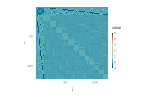

In [15]:
using Gadfly
Gadfly.spy(A)
# imshow(A)

Computed coordinates of $\Delta^2 - \kappa\Delta$ in the basis (at the beginning)

In [16]:
@show (Δ² - κ*Δ);

Δ² - κ * Δ = Element of Group Algebra over Float64
[70.7943,-16.8995,-16.8995,-16.8995,-16.8995,-16.8995,-16.8995,-16.8995,-16.8995,-16.8995,-16.8995,-16.8995,-16.8995,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]


# Checking the correctness

Let us check that the computed (approximated!) floating point matrix $A$ actually is positively semi-definite (up to some floating point error!):

In [28]:
rounded_eigenvalues_A = round(sort(eigvals(A)),TOL)'
@show rounded_eigenvalues_A;

rounded_eigenvalues_A = [-2.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -1.0e-9 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 1.0e-9 2.0e-9 2.0e-9 2.0e-9 5.85665 5.85665 6.15125 6.15125 6.15125 6.48966 6.48966 6.48966 6.61277 6.61277 7.93277]


Since $A$ is also symmetric we can find its root $\sqrt{A}$, i.e. a matrix satisfying $\sqrt{A}\sqrt{A}^T = A$:

In [29]:
@show A == Symmetric(A)
A_sqrt = real(sqrtm(Symmetric(A)));

A == Symmetric(A) = true


## Warning
Due to floating-point arithmetic, knowledge of $\sqrt{A}$ only gives an approximate decomposition of $\Delta^2 - \kappa\Delta$ into sum of hermitian squares. Approximate i.e. if we set $X = (1, x, x^{-1}, \ldots)$, then 

$$\left\| (\Delta^2 - \kappa\Delta) - X^*AX^{T}\right\|_\infty < 1.1\cdot 10^{-6}.$$

In [30]:
floating_SOS = resulting_SOS(A_sqrt, Δ)

floating_point_distance = norm(floating_SOS - (Δ²-κ*Δ), Inf)
@show floating_point_distance;

floating_point_distance = 2.138915533578256e-8


## Checking Rationally

In [31]:
A_sqrt_rational = Array{Rational{BigInt},2}(round((10^TOL)*A_sqrt,0))

Δ_rational = convert(Rational{BigInt}, Δ )
Δ²_rational = convert(Rational{BigInt}, Δ²);
@assert Δ_rational*Δ_rational == Δ²_rational

κ_rational = rationalize(BigInt, κ)
# @show(norm(Δ-Δ_rational, Inf))
# @show(norm(Δ²-Δ²_rational, Inf))
# @show(norm(κ-κ_rational))
# @show(maxabs((10^TOL)*A_sqrt-A_sqrt_rational)/10^TOL);

const EOI = Δ²_rational - κ_rational*Δ_rational

rational_SOS = resulting_SOS(A_sqrt_rational, Δ)//10^(2*TOL) 
rational_distance = norm(rational_SOS - EOI, Inf)
@show rational_distance;

rational_distance = 2.478455540080956980681875675141175225375506936376126899286240020874535316025564e-08


In [32]:
A_sqrt_corrected = correct_to_augmentation_ideal(A_sqrt_rational);

In [33]:
corrected_rational_SOS = resulting_SOS(A_sqrt_corrected, Δ_rational)//10^(2*TOL)
corrected_rational_distance = maxabs((corrected_rational_SOS - EOI).coordinates)
@show corrected_rational_distance;
@show float(corrected_rational_distance)
@show corrected_rational_SOS;

corrected_rational_distance = 6890048458160433089//278140993900000000000000000
float(corrected_rational_distance) = 2.477178340937981774070305427207290927854845779351333510856487954758832836686713e-08
corrected_rational_SOS = Element of Group Algebra over Rational{BigInt}
Rational{BigInt}[856611546105105027971//12100000000000000000,-61856499365614410153867//3660250000000000000000,-61856499401009337536803//3660250000000000000000,-15464124843152043280303//915062500000000000000,-123712998732695761484897//7320500000000000000000,-12371299880650121655707//732050000000000000000,-30928249687378680613633//1830125000000000000000,-61856499365614410153867//3660250000000000000000,-61856499401009337536803//3660250000000000000000,-15464124843152043280303//915062500000000000000,-123712998732695761484897//7320500000000000000000,-12371299880650121655707//732050000000000000000,-30928249687378680613633//1830125000000000000000,14641000007137914480999//14641000000000000000000,7320499996092440137641//3660250

In [38]:
@show norm(floating_SOS - (Δ²-κ*Δ), Inf)
@show norm(rational_SOS - (Δ²-κ*Δ), Inf)
@show norm(corrected_rational_SOS - (Δ²-κ*Δ), Inf);

norm(floating_SOS - (Δ² - κ * Δ),Inf) = 1.2806626159544976e-7
norm(rational_SOS - (Δ² - κ * Δ),Inf) = 1.166245585359110984718427062034606933593749999999999999999999999999999995038896e-06
norm(corrected_rational_SOS - (Δ² - κ * Δ),Inf) = 1.166384273185079156291407049740364737022477545932654873301004029779386648940086e-06
